In [1]:

import brainpy.math as bm
import numpy as np
from PCCAN_utils import animate_sweeps
from models import PC_cell_topdown_asym

#for generting behavioral trajectory
from ratinabox.Environment import Environment
from ratinabox.Agent import Agent

#for plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import time


%matplotlib inline  
%load_ext autoreload 
%autoreload 2

## Section 1: generate behavioral running trajectories in open fields using RatInABox

/tmp/ipykernel_2301673/315922291.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("cool")  # 'winter' transitions from green to blue


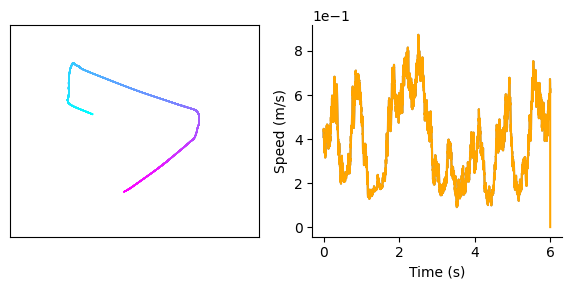

In [2]:
np.random.seed(1234)

Env = Environment(params={
    'scale':1,
    "dimensionality": "2D",
})

dur = 6 #in seconds
dt = 0.001 #in seconds
speed_mean = 0.4 #in m/s
speed_std = 0.0 #in m/s
rotation_velocity_std = 5 * (np.pi / 180) #in rad/s


Ag = Agent(Env, params = {
    "dt": dt,
    "speed_mean":speed_mean,
    "speed_std": speed_std,
    "rotational_velocity_std": rotation_velocity_std, #set to 120 or 360 will change the tutoriocity of the trajectory
    })

while Ag.t < dur:
    Ag.update(drift_velocity=None)

Position = Ag.history['pos']
Position = np.array(Position) + 0.5 #add 0,5 is to make the running rat in the middle of the box [from 0.5 to 1.5], the size of the neuronal sheet is 2by2. we did so to remove the periodic boundary effect
# Position_2_2pi = Position*(2*np.pi)-np.pi
Vel = Ag.history['vel']
Speed = np.linalg.norm(Vel, axis=1) * dt # meters per ms

diff = np.diff(Position, axis=0)
Vel2 = np.zeros_like(Position)
Vel2[:-1,:] = diff
Speed2 = np.linalg.norm(Vel2, axis=1)

#visualize the trajectory
fig, axs = plt.subplots(1, 2, figsize=(6,3))
ax = axs[0]
# Set up a colour map from green to blue
cmap = cm.get_cmap("cool")  # 'winter' transitions from green to blue

# Plot each segment with a different colour
for i in range(len(Position) - 1):
    ax.plot(
        [Position[i, 0], Position[i + 1, 0]], 
        [Position[i, 1], Position[i + 1, 1]], 
        color=cmap(i / len(Position)), 
        linewidth=1
    )
ax.axis('equal')
ax.set_xticks([0,2])
ax.set_yticks([0,2])

ax = axs[1]
ax.plot(np.arange(len(Speed))*dt, Speed/dt, label='speed', color='grey')
ax.plot(np.arange(len(Speed))*dt, Speed2/dt, label='speed2', color='orange')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.set_ylabel('Speed (m/s)')
ax.set_xlabel('Time (s)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()

# np.random.seed(111)

# Env = Environment(params={
#     'scale':1,
#     "dimensionality": "2D",
# })

# dur = 10 #in seconds
# dt = 0.001 #in seconds
# speed_mean = 0.2 #in m/s
# speed_std = 0.0 #in m/s
# rotation_velocity_std = 60 * (np.pi / 180) #in rad/s

# Ag = Agent(Env, params = {
#     "dt": dt,
#     "speed_mean":speed_mean,
#     "speed_std": speed_std,
#     "rotational_velocity_std": rotation_velocity_std, #set to 120 or 360 will change the tutoriocity of the trajectory
#     })

# while Ag.t < dur:
#     Ag.update(drift_velocity=None)

# Position = Ag.history['pos']
# Position = np.array(Position) + 0.5
# # Position_2_2pi = Position*(2*np.pi)-np.pi
# Vel = Ag.history['vel']
# Speed = np.linalg.norm(Vel, axis=1) * dt # meters per ms

# diff = np.diff(Position, axis=0)
# Vel2 = np.zeros_like(Position)
# Vel2[:-1,:] = diff
# Speed2 = np.linalg.norm(Vel2, axis=1)

# #visualize the trajectory
# fig, axs = plt.subplots(1, 2, figsize=(6,3))
# ax = axs[0]
# # ax.plot(Position[:,1], Position[:,0], linewidth=0.5, color='black')
# # ax.axis('equal')
# # ax.set_xticks([])
# # ax.set_yticks([])
# # #invert_yaxis

# # Set up a colour map from green to blue
# cmap = cm.get_cmap("cool")  # 'winter' transitions from green to blue

# # Plot each segment with a different colour
# for i in range(len(Position) - 1):
#     ax.plot(
#         [Position[i, 0], Position[i + 1, 0]], 
#         [Position[i, 1], Position[i + 1, 1]], 
#         color=cmap(i / len(Position)), 
#         linewidth=1
#     )
# ax.axis('equal')
# ax.set_xticks([0,2])
# ax.set_yticks([0,2])
# # ax.invert_yaxis()

# ax = axs[1]
# ax.plot(np.arange(len(Speed))*dt, Speed/dt, label='speed', color='grey')
# ax.plot(np.arange(len(Speed))*dt, Speed2/dt, label='speed2', color='orange')
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
# ax.set_ylabel('Speed (m/s)')
# ax.set_xlabel('Time (s)')
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# plt.tight_layout()

In [4]:
Position

array([[0.69114108, 1.12226486],
       [0.69073696, 1.12243156],
       [0.69032428, 1.12260177],
       ...,
       [0.92236367, 0.55364428],
       [0.9218128 , 0.5533836 ],
       [0.9212456 , 0.55311456]])

In [5]:
Speed

array([0.0004093 , 0.00043716, 0.0004464 , ..., 0.00062975, 0.00060943,
       0.00062778])

## Section 2: plot bottom up and top down theta modulations

2025-01-24 13:27:32.741120: W external/xla/xla/service/gpu/nvptx_compiler.cc:763] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.5.40). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


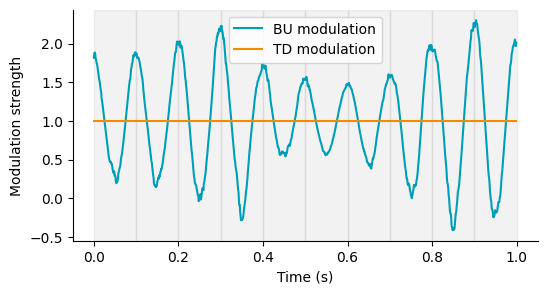

In [3]:
#set simulation parameters
bm.set_platform('gpu')
bm.set_dt(1.)

#hyperparameters
alpha_pc = 2.0 #theta modulation scale
v0 = 1/1000 #baseline speed per ms  
T_theta = 100 #ms, length of a theta cycle; frequency=10Hz
num = 50 #number of PC cells on x or y axis


theta_mod_strength = alpha_pc * 1/v0 * Speed #faster run, higher theta modulation strength
#calculate thetamodulator at time step i
time_points= np.arange(len(Position))
theta_phase = bm.mod(time_points, T_theta)/T_theta
ThetaModulator_BU = 1+theta_mod_strength*bm.cos(theta_phase*2*bm.pi)
ThetaModulator_TD = 1*np.ones_like(ThetaModulator_BU)   #1+theta_mod_strength*bm.cos(theta_phase*2*bm.pi + bm.pi)

time_stamps = np.arange(len(Position))*dt
index = time_stamps < 1.0


fig, ax = plt.subplots(1, 1, figsize=(6,3))
ax.plot(time_stamps[index], ThetaModulator_BU[index], label='BU modulation', color='#009FB9')
ax.plot(time_stamps[index], ThetaModulator_TD[index], label='TD modulation', color='#F18D00')
#every 100 points is a cycle, add vertical area to indicate theta cycle
for i in range(0,np.sum(index), 100):
    ax.axvspan(time_stamps[i], time_stamps[i+100], color='grey', alpha=0.1)
ax.legend()
ax.set_xlabel('Time (s)', fontsize=10)
ax.set_ylabel('Modulation strength', fontsize=10)
sns.despine()
plt.savefig('figures/theta_modulation.png', dpi=300)

## Section 3: Simulate the model. Top down input makes the sweeps attract to the goal location. So there are two sweeps competing with each other. The bump will do theta sweeps along the trajectory and also attract to the goal location if YOU SET Topdown=True.

In [9]:
#set simulation parameters
bm.set_platform('gpu')
bm.set_dt(1.)

#hyperparameters
m0 = 12  #adaptation strength as zero
z_min = 0; z_max = 2 #the size of the environment, have to be the same as the environment size
duration = int(dur/dt) #simulation duration of the trajectory
alpha_pc = 0.5 #theta modulation scale
v0 = 1/1000 #baseline speed per ms  
T_theta = 100 #ms, length of a theta cycle; frequency=10Hz
num = 50 #number of PC cells on x or y axis
goal_loc = (0.75, 0.75)
bm.clear_buffer_memory(platform='gpu')

topdown=False

PC_net = PC_cell_topdown_asym(num=num, 
                        tau=10, 
                        tauv=150, 
                        m0=m0, 
                        k=1, 
                        a=0.20, 
                        A=10.0, 
                        J0=8.0, 
                        goal_a=0.6,
                        goal_b=1.0,
                        goal_A=4.0,
                        asym_J0 = 0.1,
                        asym_a = 0.5,
                        z_min=z_min, 
                        z_max=z_max,    
                        conn_noise=0.0, 
                        rec_noise=0.0,     
                        goal_loc=goal_loc,
                        topdown=topdown,
                        asymmetry=False,
                        tdstyle='Gaussian')

def runNet(i, Animal_location, Speed):
    theta_mod_strength = alpha_pc * 1/v0 * Speed #faster run, higher theta modulation strength
    #calculate thetamodulator at time step i
    t = i*bm.dt
    theta_phase = bm.mod(t, T_theta)/T_theta
    ThetaModulator_BU = 0.5+theta_mod_strength*bm.cos(theta_phase*2*bm.pi)
    Topdown_mod = 1.2 #1+theta_mod_strength*bm.cos(theta_phase*2*bm.pi + bm.pi)
    
    #update place cell network using step_run
    PC_net.step_run(i, Animal_location, ThetaModulator_BU, Topdown_mod)
    
    #get intermidiate results
    pc_activity = PC_net.r
    pc_bumcenter = PC_net.center
    return pc_activity, pc_bumcenter, ThetaModulator_BU

time_steps = np.arange(len(Position))
print('Running simulation...')
pc_activity, pc_bumpcenter, ThetaModulator_BU = bm.for_loop(runNet, (time_steps, Position, Speed))

#animate the sweeps and save the animation
print('Animating...')
save_path = './animations/'
filename_prefix = 'Topdown_'+str(topdown)+'_'
#add time to the filenamex
time_str = time.strftime("%Y%m%d-%H%M%S")
filename_prefix = filename_prefix + time_str + '_'

if topdown:
    animate_sweeps(Position, pc_activity, num, duration, Speed, m0, z_max, n_step=10, goal_loc=goal_loc, save_path=save_path, filename_prefix=filename_prefix, dpi=100)
else:
    animate_sweeps(Position, pc_activity, num, duration, Speed, m0, z_max, n_step=10, goal_loc=None, save_path=save_path, filename_prefix=filename_prefix, dpi=100)

Running simulation...


MovieWriter imagemagick unavailable; using Pillow instead.


Animating...
Animation saved to ./animations/Topdown_False_20250124-140026_12.gif


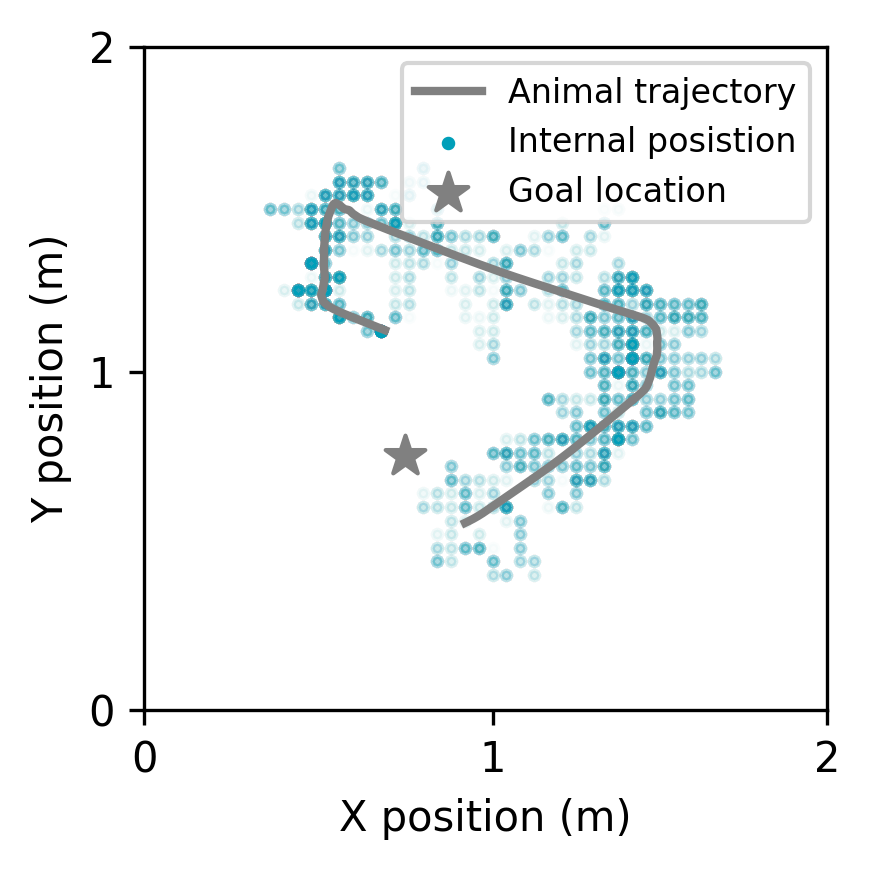

In [10]:
fig, ax  = plt.subplots(1, 1, figsize=(3,3), dpi=300)
# Static plot for position and bump center in the second subplot (axs[1])
ax.plot(Position[:, 0]/z_max * num, Position[:, 1]/z_max * num, color='grey', linewidth=2, label='Animal trajectory')
ax.scatter(pc_bumpcenter[:, 0], pc_bumpcenter[:, 1], color='#009FB9', s=5, alpha=0.02)
ax.scatter(pc_bumpcenter[0, 0], pc_bumpcenter[0, 1], color='#009FB9', s=5, label='Internal posistion', alpha=1.0) #only for label legend use

if topdown:
    ax.scatter(goal_loc[0]/z_max*num, goal_loc[1]/z_max*num, color='#F28D00', marker='*', s=100, label='Goal location')
else:
    ax.scatter(goal_loc[0]/z_max*num, goal_loc[1]/z_max*num, color='grey', marker='*', s=100, label='Goal location')

ax.set_xticks([0, num//2, num-1])
ax.set_xticklabels([0, 1, 2])
ax.set_yticks([0, num//2, num-1])
ax.set_yticklabels([0, 1, 2])
ax.legend(fontsize=8)
ax.set_xlabel('X position (m)', fontsize=10)
ax.set_ylabel('Y position (m)', fontsize=10)

plt.tight_layout()

plt.savefig('./figures/TD_sweeptraj_topdown_'+str(topdown)+'.png', dpi=300)

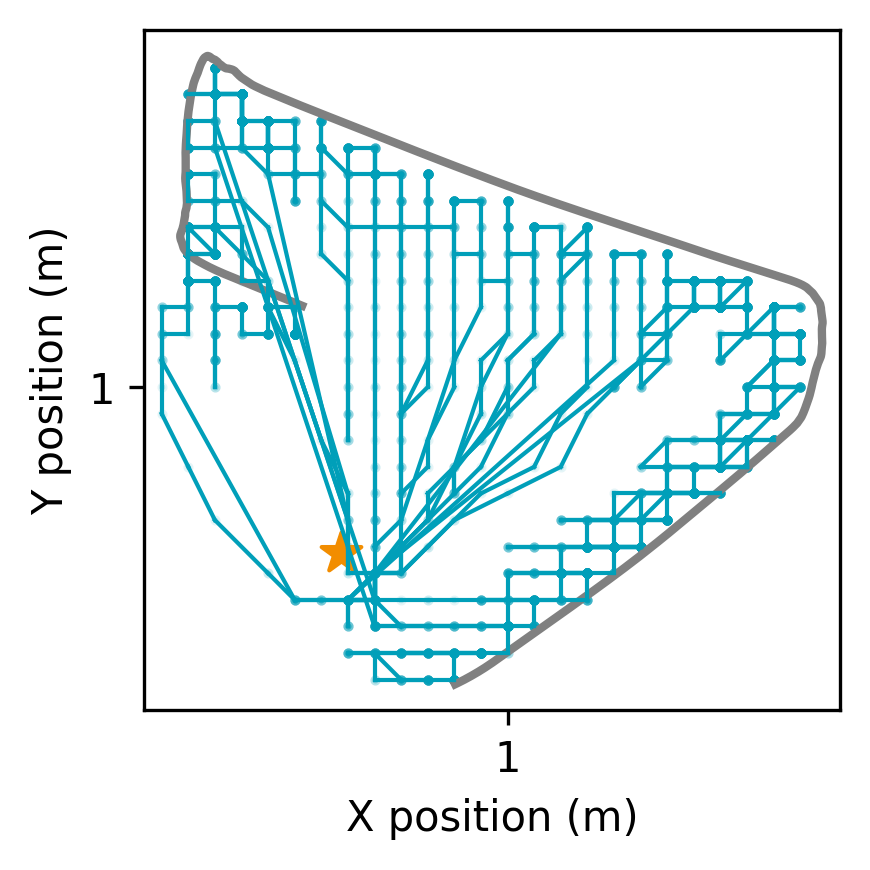

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3), dpi=300)

# Plot the continuous trajectory for Position
ax.plot(Position[:, 0]/z_max * num, Position[:, 1]/z_max * num, color='grey', linewidth=2, label='Actual pos')
ax.scatter(pc_bumpcenter[:, 0], pc_bumpcenter[:, 1], color='#009FB9', s=2, alpha=0.1)
ax.scatter(pc_bumpcenter[0, 0], pc_bumpcenter[0, 1], color='#009FB9', s=2, label='Internal posistion', alpha=1.0) #only for label legend use

if topdown:
    ax.scatter(goal_loc[0]/z_max*num, goal_loc[1]/z_max*num, color='#F28D00', marker='*', s=100, label='Goal loc')
else:
    ax.scatter(goal_loc[0]/z_max*num, goal_loc[1]/z_max*num, color='grey', marker='*', s=100, label='Goal loc')

# Threshold for distance
threshold = 100

# Collect segments that meet the threshold condition
x_segments = []
y_segments = []
for i in range(len(pc_bumpcenter) - 1):
    # Calculate the Euclidean distance between consecutive points
    dist = np.sqrt((pc_bumpcenter[i+1, 0] - pc_bumpcenter[i, 0])**2 + (pc_bumpcenter[i+1, 1] - pc_bumpcenter[i, 1])**2)
    
    # If distance is below threshold, add segment to list
    if dist < threshold:
        x_segments.append([pc_bumpcenter[i, 0], pc_bumpcenter[i+1, 0]])
        y_segments.append([pc_bumpcenter[i, 1], pc_bumpcenter[i+1, 1]])

# Plot all segments at once
for x_seg, y_seg in zip(x_segments, y_segments):
    ax.plot(x_seg, y_seg, color='#009FB9', linewidth=1)

# Set fixed ticks and labels
ax.set_xticks([0, num//2, num-1])
ax.set_xticklabels([0, 1, 2])
ax.set_yticks([0, num//2, num-1])
ax.set_yticklabels([0, 1, 2])

ax.set_xlabel('X position (m)', fontsize=10)
ax.set_ylabel('Y position (m)', fontsize=10)

# Add legend
# ax.legend(fontsize=8)

#equal axis
ax.axis('equal')

plt.tight_layout()

plt.savefig('./figures/TD_sweeptraj_topdown_'+str(topdown)+'_segments.pdf', dpi=300)



### sweeps in successive theta cycles

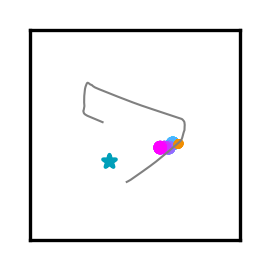

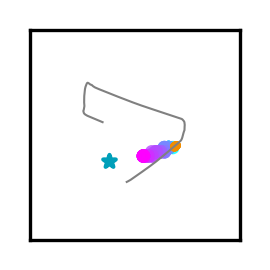

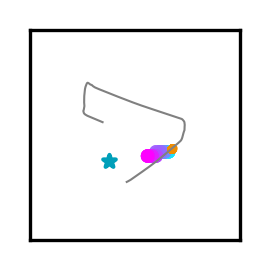

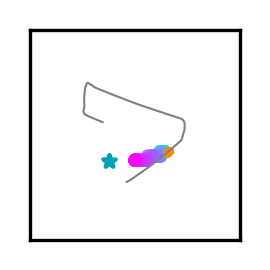

In [7]:
for i in range(4):

    start = 4500 + 100*i
    fig, ax = plt.subplots(1, 1, figsize=(1,1), dpi=300)

    cut1 = 20
    cut2 = 70

    # Define the colormap and normalize it
    cmap = plt.cm.cool
    norm = plt.Normalize(vmin=start+cut1, vmax=start+cut2)


    ax.plot(Position[:, 0]/z_max * num, Position[:, 1]/z_max * num, color='grey', linewidth=0.5, label='Actual pos')

    ax.scatter(
        pc_bumpcenter[start+cut1:start+cut2, 0],
        pc_bumpcenter[start+cut1:start+cut2, 1],
        c=np.linspace(start+cut1, start+cut2, cut2-cut1),  # Gradually changing values
        cmap=cmap,
        s=5,
        label='Internal pos',
        alpha = 0.8
    )

    ax.scatter(goal_loc[0]/z_max*num, goal_loc[1]/z_max*num, color='#009FB9', marker='*', s=10, label='Goal loc.')
    
    #add animals pos from start to start + cut
    ax.scatter(Position[start+cut1:start+cut2, 0]/z_max*num, 
               Position[start+cut1:start+cut2, 1]/z_max*num, color='#F18D00', 
               marker = 'o', s=1, label='Actual pos')
    
    ax.set_xlim([0, num])
    ax.set_ylim([0, num])
    ax.set_xticks([])
    ax.set_yticks([])

    plt.tight_layout()
    plt.savefig(f'./figures/Topdown_Goal_adaptation_{start}.pdf', dpi=300)
